# Supplemental Figure XXX: Comparision between RSIA and DSSR motifs

# Setup

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from rna_motif_library.plotting import publication_style_ax
from rna_motif_library.dataframe_tools import add_motif_indentifier_columns

PLOT_PATH = "../../figures/plots"

In [2]:
df = pd.read_json("../../data/summaries/other_motifs/dssr_motifs_compared.json")

In [3]:
df["in_tc"] = df["in_tc"].fillna(False)
df["n_contained_in_motifs"] = df["contained_in_motifs"].apply(len)
df["n_overlapping_motifs"] = df["overlapping_motifs"].apply(len)

In [4]:
df = df.query("in_low_quality_motif == 0")

In [5]:
len(df)

1169327

In [6]:
df.iloc[0]

pdb_id                                                                6ZRS
motif                                       HELIX-CUGGGCGG-CCGCCUGG-6ZRS-1
mtype                                                                HELIX
n_strands                                                                2
n_basepairs                                                              8
n_basepair_ends                                                          2
n_residues                                                              16
residues                 [K-C-79-, K-U-80-, K-G-81-, K-G-82-, K-G-83-, ...
correct_n_strands                                                        1
correct_n_basepairs                                                      1
has_singlet_flank                                                        0
in_our_db                                                                1
misclassified                                                            0
in_other_db              

# Plots

## Supplemental Figure XXXA: Overlap of motifs in RSIA and DSSR


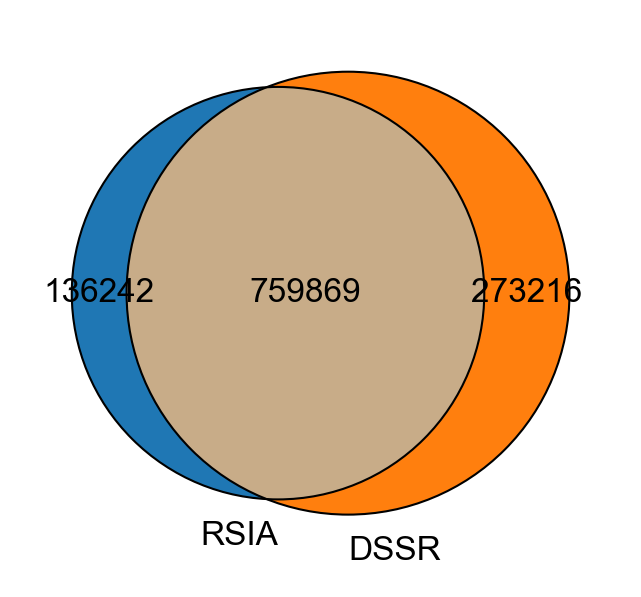

In [8]:
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)
in_our_db = len(df[df["in_our_db"] == True])
in_other_db = len(df[df["in_other_db"] == True])
overlap = len(df[(df["in_our_db"] == True) & (df["in_other_db"] == True)])
# print(in_our_db, in_other_db, overlap)
v = venn2(
    subsets=(in_our_db - overlap, in_other_db - overlap, overlap),
    set_labels=("RSIA", "DSSR"),
    set_colors=sns.color_palette()[0:2],
    alpha=1.0,  # Added alpha parameter to control opacity
)
plt.rcParams['font.family'] = 'Arial'
c = venn2_circles(subsets=(in_our_db - overlap, in_other_db - overlap, overlap), linestyle="solid", lw=0.5)
publication_style_ax(ax)
fig.savefig(
    os.path.join(PLOT_PATH, "supplemental_dssr_compare_motifs_1a.png"),
    bbox_inches="tight",
)

In [9]:
print("number in our database", in_our_db)
print("number in dssr", in_other_db)
print("overlap", overlap)
print("% overlap in our database", overlap / in_our_db * 100)
print("% overlap in dssr", overlap / in_other_db * 100)
print("only in dssr", in_other_db - overlap)

number in our database 896111
number in dssr 1033085
overlap 759869
% overlap in our database 84.79630313655339
% overlap in dssr 73.55338621701021
only in dssr 273216


## Supplemental Figure XXXB: Reasons for missing motifs in DSSR

In [10]:
df_dssr = df.query("in_our_db == False").copy()

In [11]:
print(len(df_dssr))

273216


In [12]:
# Create a new dataframe that groups motifs by their contained_in_motifs
# First create a dictionary to store motifs that share contained_in_motifs
shared_motifs = {}

# Iterate through each row in the dataframe
for idx, row in df_dssr.iterrows():
    # Get the list of contained motifs for this row
    contained_motifs = row["contained_in_motifs"]

    # Skip if no contained motifs
    if not contained_motifs:
        continue

    # For each contained motif, add the current motif to its group
    for contained_motif in contained_motifs:
        if contained_motif not in shared_motifs:
            shared_motifs[contained_motif] = []
        shared_motifs[contained_motif].append(row["motif"])

# Convert to dataframe
shared_motifs_df = pd.DataFrame(
    [
        {"contained_motif": k, "sharing_motifs": v, "count": len(v)}
        for k, v in shared_motifs.items()
    ]
)

# Sort by count in descending order
shared_motifs_df = shared_motifs_df.sort_values("count", ascending=False)

In [13]:
shared_motifs_df = add_motif_indentifier_columns(shared_motifs_df, "contained_motif")
shared_motifs_df["n_helix"] = shared_motifs_df["sharing_motifs"].apply(
    lambda x: sum(1 for motif in x if motif.startswith("HELIX"))
)

In [36]:
shared_motifs_df["n_helix"].value_counts()

0    84661
1     9710
2     1932
3       50
4        4
Name: n_helix, dtype: int64

In [37]:
row = (
    shared_motifs_df.query("mtype == 'SSTRAND'")
    .sort_values("n_helix", ascending=False)
    .iloc[4]
)

# Print the contained motif identifier
print(row["contained_motif"])
# Print each motif that shares this hairpin
for shared_motif in row["sharing_motifs"]:
    print(shared_motif)

SSTRAND-29-XXXXXXUCAGUACGAUAGGAACCXXXXXX-1JBS-2
HELIX-XXXXXX-XXXXXX-1JBS-2
TWOWAY-XUCAGUAC-GGAACCX-1JBS-2
HAIRPIN-CGAUAG-1JBS-2


In [13]:
df_dssr.query("in_tc == True")

,pdb_id,motif,mtype,n_strands,n_basepairs,n_basepair_ends,n_residues,residues,correct_n_strands,correct_n_basepairs,has_singlet_flank,in_our_db,misclassified,in_other_db,overlapping_motifs,contained_in_motifs,in_tc,in_low_quality_motif,n_contained_in_motifs,n_overlapping_motifs
4,4V9H,HELIX-UCC-GGA-4V9H-1,HELIX,2,3,2,6,"[AA-U-17-, AA-C-18-, AA-C-19-, AA-G-916-, AA-G...",1,1,0,0,0,1,"[HAIRPIN-9-UUUGAUCCUGG-4V9H-1, SSTRAND-8-AAAGG...",[],1,0,0,2
37,4V9H,HELIX-GGC-GCC-4V9H-1,HELIX,2,3,2,6,"[AA-G-505-, AA-G-506-, AA-C-507-, AA-G-524-, A...",1,1,0,0,0,1,"[TWOWAY-6-0-CGGCCAAC-GG-4V9H-1, HAIRPIN-4-CAGC...",[],1,0,0,2
41,4V9H,HELIX-GU-AC-4V9H-1,HELIX,2,2,2,4,"[AA-G-570-, AA-U-571-, AA-A-865-, AA-C-866-]",1,1,0,0,0,1,[NWAY-10-7-4-1-CCCUAAACGAUG-CGUAAAGGG-CGAAAG-C...,[],1,0,0,2
101,4V9H,HELIX-GAA-UUC-4V9H-1,HELIX,2,3,2,6,"[AV-G-34-, AV-A-35-, AV-A-36-, AX-U-18-, AX-U-...",1,1,0,0,0,1,"[HAIRPIN-7-AUUGAAAAU-4V9H-1, SSTRAND-6-AUGUUC-...",[],1,0,0,2
111,4V9H,HELIX-GC-GC-4V9H-8,HELIX,2,2,2,4,"[BA-G-61-, BA-C-62-, BA-G-93-, BA-C-94-]",1,1,0,0,0,1,"[HAIRPIN-8-UGGCUACCUG-4V9H-1, HAIRPIN-7-CGGUAG...",[],1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207029,4WQY,HAIRPIN-ACUGGCCGUGAAGAU-4WQY-2,HAIRPIN,1,2,1,15,"[CA-A-2020-, CA-C-2021-, CA-U-2022-, CA-G-2023...",1,1,1,0,0,1,"[SSTRAND-11-GAAAUUGAACU-4WQY-1, HELIX-5-CGGCC-...",[],1,0,0,3
1207031,4WQY,HAIRPIN-CUCCGG-4WQY-2,HAIRPIN,1,1,1,6,"[CA-C-2143-, CA-U-2144-, CA-C-2145-, CA-C-2146...",1,1,1,0,0,1,[HAIRPIN-8-GCCUCCGGGU-4WQY-1],[HAIRPIN-8-GCCUCCGGGU-4WQY-1],1,0,1,1
1207034,4WQY,HAIRPIN-GGUCGCCUCCUAAAAGGUAAC-4WQY-2,HAIRPIN,1,4,1,21,"[CA-G-2255-, CA-G-2256-, CA-U-2257-, CA-C-2258...",1,1,1,0,0,1,"[HAIRPIN-7-CUGGGGCGG-4WQY-2, HELIX-3-GAC-GUC-4...",[],1,0,0,5
1207063,4WQY,HAIRPIN-CCAACUCCGUGCCAGCAG-4WQY-2,HAIRPIN,1,3,1,18,"[DA-C-507-, DA-C-508-, DA-A-509-, DA-A-510-, D...",1,1,0,0,0,1,"[TWOWAY-6-0-CGGCCAAC-GG-4WQY-2, HELIX-5-CGGAG-...",[],1,0,0,4


In [38]:
df_dssr["reason"] = ""
df_dssr.loc[
    (df_dssr["correct_n_strands"] == 0) & (df_dssr["reason"] == ""), "reason"
] = "Incorrect number of strands"
df_dssr.loc[
    (df_dssr["correct_n_basepairs"] == 0) & (df_dssr["reason"] == ""), "reason"
] = "Incorrect number of basepairs"
df_dssr.loc[
    (df_dssr["has_singlet_flank"] == 1) & (df_dssr["reason"] == ""), "reason"
] = "Has singlet flank"
df_dssr.loc[(df_dssr["in_tc"] == 1) & (df_dssr["reason"] == ""), "reason"] = (
    "Is a tertiary contact"
)
df_dssr.loc[
    (df_dssr["n_contained_in_motifs"] > 1) & (df_dssr["reason"] == ""), "reason"
] = "Combination of smaller motifs"
df_dssr.loc[
    (df_dssr["n_overlapping_motifs"] > 0) & (df_dssr["reason"] == ""), "reason"
] = "Parts of other motifs"
df_dssr.loc[df_dssr["reason"] == "", "reason"] = "Other"

In [39]:
df_dssr["reason"].value_counts()

Has singlet flank                174062
Is a tertiary contact             58332
Parts of other motifs             39213
Incorrect number of strands        1351
Incorrect number of basepairs       158
Other                               100
Name: reason, dtype: int64

In [53]:
df_sub = df_dssr.query("n_contained_in_motifs > 0 and has_singlet_flank == False")
df_sub.to_json("overlapping_motifs.json", orient="records")
print(len(df_sub))


63466


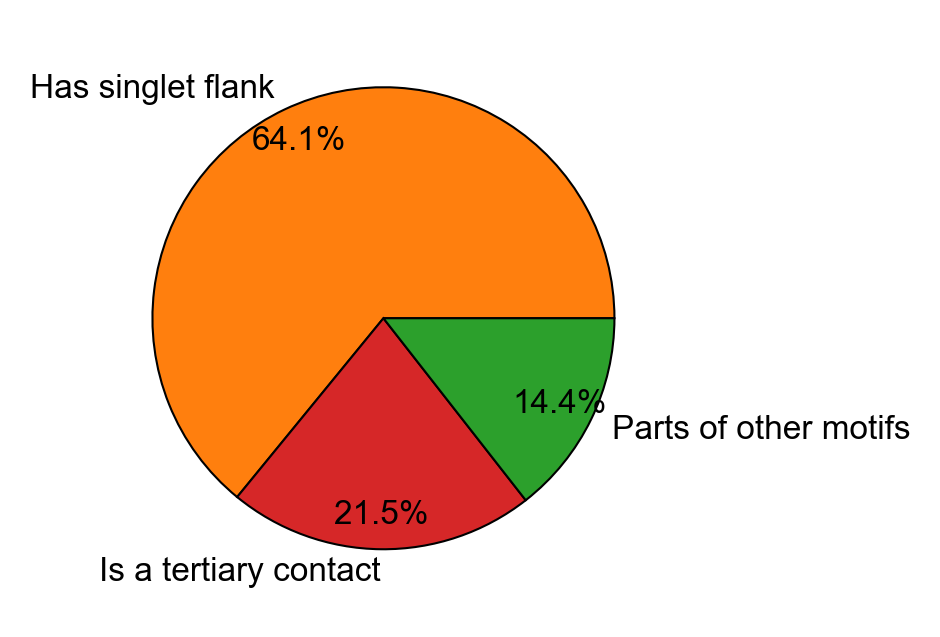

In [41]:
# Get value counts and sort in descending order
reason_counts = df_dssr["reason"].value_counts()

# Filter out values less than 0.2%
total = reason_counts.sum()
reason_counts = reason_counts[reason_counts / total >= 0.02]

# Create figure and axis
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)

# Create pie chart with colors matching the figure
colors = [
    "#ff7f0e",  # Orange for "Has singlet flank",
    "#d62728",  # Red for "In tertiary contact",
    "#2ca02c",  # Green for "Contained in motif"
    "#1f77b4",  # Blue for "Incorrect number of strands"
    sns.color_palette()[5],
    sns.color_palette()[6],
]  # Purple for "Other"


wedges, texts, autotexts = ax.pie(
    reason_counts.values,
    labels=reason_counts.index,
    colors=colors,
    autopct="%1.1f%%",
    pctdistance=0.85,
    wedgeprops=dict(edgecolor="black", linewidth=0.5),
)

# Customize plot
plt.setp(autotexts, size=6, fontname="Arial")
plt.setp(texts, size=6, fontname="Arial")

publication_style_ax(ax)
fig.savefig(
    os.path.join(PLOT_PATH, "supplemental_dssr_compare_motifs_1b.png"),
    bbox_inches="tight",
)

## Supplemental Figure XXXC: Example of "Is a tertiary contact"

pse: pses/motif-as-a-tertiary-contact-1.pse

In [42]:
df_dssr.query("motif == 'HELIX-CAGGGU-GCCCUG-2HO6-1'")

,pdb_id,motif,mtype,n_strands,n_basepairs,n_basepair_ends,n_residues,residues,correct_n_strands,correct_n_basepairs,...,in_our_db,misclassified,in_other_db,overlapping_motifs,contained_in_motifs,in_tc,in_low_quality_motif,n_contained_in_motifs,n_overlapping_motifs,reason
892090,2HO6,HELIX-CAGGGU-GCCCUG-2HO6-1,HELIX,2,6,2,12,"[B-C-42-, B-A-43-, B-G-44-, B-G-45-, B-G-46-, ...",1,1,...,0,0,1,"[HAIRPIN-12-AGGGCAGGGUUUAU-2HO6-1, SSTRAND-9-G...",[],1,0,0,2,Is a tertiary contact


## Supplemental Figure XXXD: Example of "Incorrect number of basepairs"

pse: pses/dssr-nway-is-tc.pse

In [43]:
df_dssr.query("motif == 'NWAY-CAGCGAAAUG-UGAAUUGCAGAAUUCCGUGAA-8EUB-1'")

,pdb_id,motif,mtype,n_strands,n_basepairs,n_basepair_ends,n_residues,residues,correct_n_strands,correct_n_basepairs,...,in_our_db,misclassified,in_other_db,overlapping_motifs,contained_in_motifs,in_tc,in_low_quality_motif,n_contained_in_motifs,n_overlapping_motifs,reason
799451,8EUB,NWAY-CAGCGAAAUG-UGAAUUGCAGAAUUCCGUGAA-8EUB-1,NWAY,2,10,2,31,"[A4-C-47-, A4-A-48-, A4-G-49-, A4-C-50-, A4-G-...",0,0,...,0,0,1,"[HAIRPIN-8-CAGCGAAAUG-8EUB-1, HAIRPIN-22-GUGAA...",[],1,0,0,2,Incorrect number of strands


## Supplemental Figure XXXE: Example of "Has a singlet flank"

pse: pses/singlet-flanked-seperated-motifs.pse

TWOWAY-CUCC-GUUG-6JE3-1
TWOWAY-CCUU-ACCG-6JE3-1

In [44]:
df_dssr.query("n_overlapping_motifs > 1 and in_tc == False")

,pdb_id,motif,mtype,n_strands,n_basepairs,n_basepair_ends,n_residues,residues,correct_n_strands,correct_n_basepairs,...,in_our_db,misclassified,in_other_db,overlapping_motifs,contained_in_motifs,in_tc,in_low_quality_motif,n_contained_in_motifs,n_overlapping_motifs,reason
125,8C8Z,HELIX-GAG-CUC-8C8Z-1,HELIX,2,4,2,6,"[A-G-271-, A-A-272-, A-G-273-, A-C-364-, A-U-3...",1,1,...,0,0,1,[NWAY-8-6-2-2-CGAUGAGUAG-UGAAUAUG-CAAG-CCAG-8C...,[HELIX-4-GAGC-GCUC-8C8Z-1],0,0,1,2,Parts of other motifs
165,8C8Z,HELIX-CAGC-GUUG-8C8Z-1,HELIX,2,4,2,8,"[A-C-1164-, A-A-1165-, A-G-1166-, A-C-1167-, A...",1,1,...,0,0,1,[NWAY-5-4-4-4-3-2-0-GAGACAC-CGAAAG-GAAGAG-GGGU...,[HELIX-6-CAGCGA-UUGUUG-8C8Z-1],0,0,1,2,Parts of other motifs
191,8C8Z,HELIX-GGC-GCU-8C8Z-1,HELIX,2,3,2,6,"[A-G-1478-, A-G-1479-, A-C-1480-, A-G-1511-, A...",1,1,...,0,0,1,"[TWOWAY-3-3-UGAGG-UGUAG-8C8Z-1, HELIX-4-GGCU-G...",[HELIX-4-GGCU-GGCU-8C8Z-1],0,0,1,2,Parts of other motifs
211,8C8Z,HELIX-GAACAU-AUGUUC-8C8Z-1,HELIX,2,6,2,12,"[A-G-2093-, A-A-2094-, A-A-2095-, A-C-2096-, A...",1,1,...,0,0,1,"[NWAY-4-3-1-GGACAG-CUAAC-CUG-8C8Z-1, HELIX-8-G...",[HELIX-8-GAACAUUG-UGAUGUUC-8C8Z-1],0,0,1,2,Parts of other motifs
222,8C8Z,HELIX-CGGU-AUCG-8C8Z-1,HELIX,2,4,2,8,"[A-C-2395-, A-G-2396-, A-G-2397-, A-U-2398-, A...",1,1,...,0,0,1,[NWAY-16-13-13-7-3-3-1-GUUUGACUGGGGCGGUCU-AGGU...,[HELIX-5-CAUCG-CGGUG-8C8Z-1],0,0,1,2,Parts of other motifs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206263,4WQY,HELIX-CCCCC-GGGGG-4WQY-1,HELIX,2,6,2,10,"[CA-C-2136-, CA-C-2137-, CA-C-2138-, CA-C-2139...",1,1,...,0,0,1,"[TWOWAY-6-3-CUGUGAAC-GGGAG-4WQY-2, HELIX-6-CCC...",[HELIX-6-CCCCCG-UGGGGG-4WQY-1],0,0,1,2,Parts of other motifs
1206326,4WQY,HELIX-CCGGAAG-CUUCCGG-4WQY-2,HELIX,2,7,2,14,"[DA-C-136-, DA-C-137-, DA-G-138-, DA-G-139-, D...",1,1,...,0,0,1,"[TWOWAY-3-2-CUACC-GAUG-4WQY-2, HELIX-4-CCGG-CC...",[],0,0,0,4,Parts of other motifs
1206331,4WQY,HELIX-GGGC-GCCC-4WQY-2,HELIX,2,4,2,8,"[DA-G-198-, DA-G-199-, DA-G-200-, DA-C-201-, D...",1,1,...,0,0,1,"[NWAY-4-3-1-1-CAUGUG-CAAAG-CGC-GAG-4WQY-2, HEL...",[],0,0,0,3,Parts of other motifs
1206380,4WQY,HELIX-UGCU-AGCA-4WQY-1,HELIX,2,4,2,8,"[DA-U-997-, DA-G-998-, DA-C-999-, DA-U-1000-, ...",1,1,...,0,0,1,"[NWAY-8-4-4-CUUGACAUGC-CUUACG-GCACAG-4WQY-1, N...",[],0,0,0,2,Parts of other motifs


In [45]:
df_dssr["has_singlet_flank"].value_counts()

1    174616
0     98600
Name: has_singlet_flank, dtype: int64

In [46]:
df_dssr["in_tc"].value_counts()

1    159703
0    113513
Name: in_tc, dtype: int64

In [47]:
df_dssr["n_contained_in_motifs"].value_counts()

1    209321
0     63895
Name: n_contained_in_motifs, dtype: int64

In [48]:
df_dssr_no_explained = df_dssr.query(
    "correct_n_strands == True and correct_n_basepairs == True and has_singlet_flank == False and in_tc == False and n_contained_in_motifs == 0"
).copy()

In [49]:
len(df_dssr_no_explained)

6548

In [50]:
df_dssr_no_explained["mtype"].value_counts()

HELIX      3012
TWOWAY     2320
HAIRPIN     721
SSTRAND     324
NWAY        171
Name: mtype, dtype: int64

In [51]:
df_dssr_no_explained["n_overlapping_motifs"].value_counts()

2    4275
3    1510
4     474
5     118
0     100
1      61
7       6
6       4
Name: n_overlapping_motifs, dtype: int64